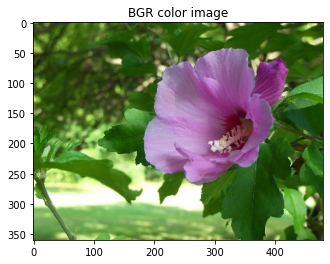

0.43341851234436035


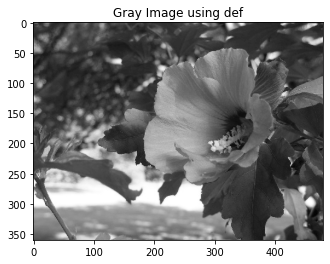

0.01530146598815918


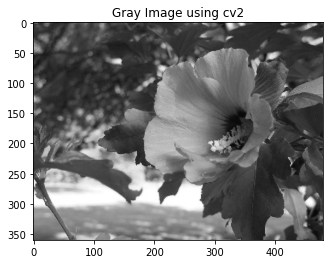

0.023378610610961914


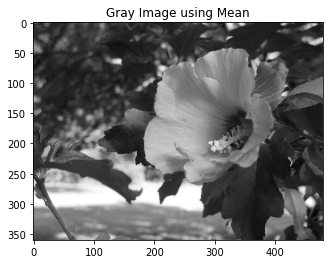

-0.30800843238830566


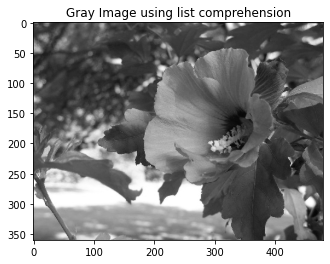

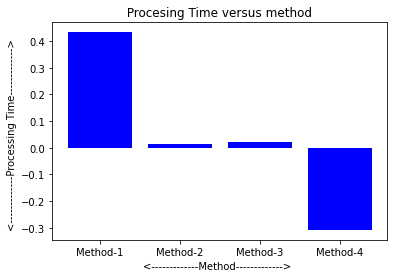

In [2]:
#color image o grayscale image using  a def function and list of comprehension method
#plot processing time comparison with other methods

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

#method 1 - using def

t1 = time.time()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = mpimg.imread("rose.jpg")

plt.savefig("OriginalRose.jpg")

plt.imshow(img)

plt.title("BGR color image")

plt.show()
    
grayDef = rgb2gray(img)

t2 = time.time()
time_def = t2 - t1
print(time_def)

plt.imshow(grayDef, cmap = plt.get_cmap('gray'))

plt.savefig("Rose_grayscale.jpg")

plt.title("Gray Image using def")

plt.show()

#method 2 - using cv2

t3 = time.time()

gray_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite('RoseGrayImage.jpg', gray_cv2)

t4 = time.time()
time_cv2 = t4 - t3
print(time_cv2)

plt.imshow(gray_cv2,cmap = plt.get_cmap('gray'))

plt.title("Gray Image using cv2")

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

#method 3 - using mean

t5 = time.time()

grayMean = np.mean(img, axis = 2)

plt.savefig("Rose1_Gray.jpg")

t6 = time.time()
time_mean = t6 - t5
print(time_mean)

plt.imshow(grayMean, cmap = plt.get_cmap('gray'))

plt.title("Gray Image using Mean")

plt.show()

#Method4 - using list comprehension method

t7 = time.time()

list = []
x, y, z = img.shape
img_cpy = np.copy(img)
img_cpy[:, :, 0] = 0.21 * img[:, :, 0]
img_cpy[:, :, 1] = 0.71 * img[:, :, 1]
img_cpy[:, :, 2] = 0.07 * img[:, :, 2]
list.append([a[0] + a[1] + a[2] for i in range(x) for a in img_cpy[i]])
gray_img = np.asarray(list, dtype = np.uint8)
gray_img = np.reshape(gray_img, [x, y])

#cv2.imwrite('RoseGrayImage.jpg', gray_img)

t8 = time.time()
time_list = t7 - t8
print(time_list)

plt.imshow(gray_img, cmap = plt.get_cmap('gray'))

plt.title("Gray Image using list comprehension")

plt.show()

#Comparison of processing speed

x = ['Method-1', 'Method-2', 'Method-3', 'Method-4']

Processing_times = [time_def, time_cv2, time_mean, time_list]

x_pos = [i for i in range (len(x))]

plt.bar(x_pos, Processing_times, color = 'blue')
plt.xlabel("<-------------Method------------->  ")
plt.ylabel("<-------------Processing Time------------->  ")
plt.title(" Procesing Time versus method ")
plt.xticks(x_pos, x)

plt.show()